# PA algorithm

Now we continue to PA algorithm. This is the same logic as in a fitness function from GA but made so it can be used with PSO.

Since pyswarms works on floats we have to round the numbers which will make our solution inaccurate because of the rounding errors.


In [72]:
# We import the necessary data from the file commons.py
from commons import *

# We save our matrix in a variable so we can use it later
processing_times = m1

In [73]:
# Logic here is the same as in GA other than that here we don't have to negate fitness and
# we have to adapt it so it works with floating point numbers
def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules

In [74]:
import pyswarms as ps

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(
    n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)
stats = optimizer.optimize(forward_prop, iters=100)


2023-04-11 14:42:25,806 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=293
2023-04-11 14:42:26,099 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 293.0, best pos: [2.14608206 4.13839659 2.93823723 4.01054633 2.83835536 2.40816142
 2.25547045 1.71093076 3.91443243 3.57129777 1.26860328 3.39858714
 2.17378462 2.96375774 3.45544295 4.10127633 4.31313146 2.58963778
 3.16192478 3.85743246 3.32760976 4.19518571 1.89915005 4.08568494
 1.18952815]


In [75]:
print(f"fitness: {stats[0]}")
print(
    f"best position: {np.around(stats[1], 0).reshape(len(processing_times), len(processing_times[0]))}")


fitness: 293.0
best position: [[2. 4. 3. 4. 3.]
 [2. 2. 2. 4. 4.]
 [1. 3. 2. 3. 3.]
 [4. 4. 3. 3. 4.]
 [3. 4. 2. 4. 1.]]


As we can see fitness is not as good as in case of GA for low complexity. Let's continue.


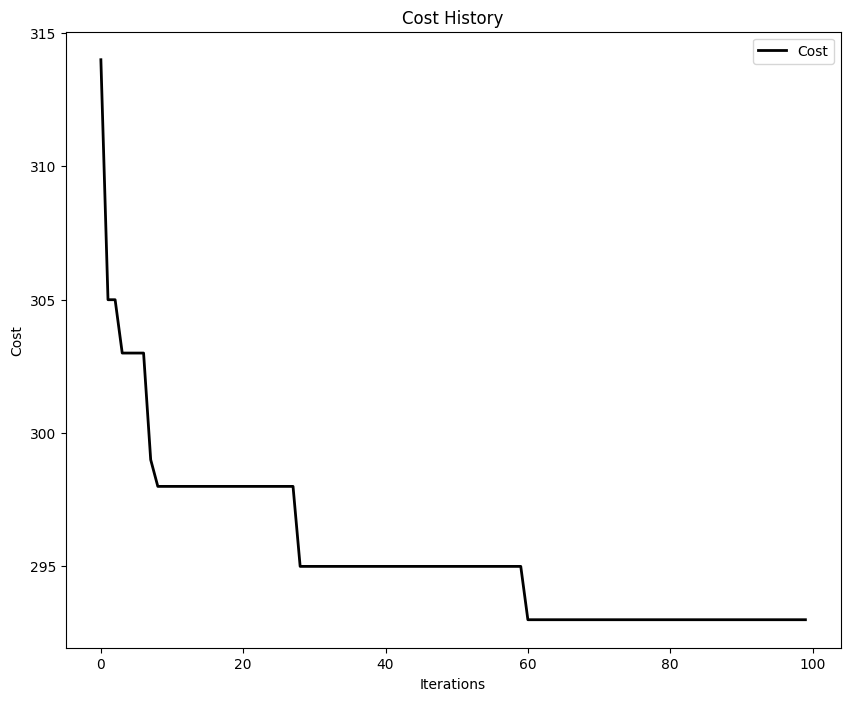

In [76]:
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()

In [77]:
processing_times = m4


# Like in ga for each complexity level we have to redefine the forward_prop function
def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules


In [78]:
x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(
    n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)
stats = optimizer.optimize(forward_prop, iters=100)


2023-04-11 14:42:26,292 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=627
2023-04-11 14:42:27,051 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 627.0, best pos: [7.3201992  4.59076984 7.79331928 9.5081161  9.48693898 4.25854814
 7.03546032 7.41172435 1.61649259 4.12201068 9.95268157 8.7611213
 6.70807675 2.46192996 6.59063558 2.76711863 3.75975373 9.30212896
 1.82992487 7.72990017 7.33041802 1.80860344 8.315564   3.43315812
 2.9525377  5.50860421 7.31292904 7.92814145 6.19686849 7.78173261
 3.59929403 3.69171848 4.48937788 5.06738289 4.368245   9.09438956
 1.2519066  8.41100918 6.76626473 4.18029313 7.21121305 2.2483129
 5.94182688 5.44284468 1.81525368 2.9862206  6.31974816 9.51484559
 5.64369542 7.30878128 4.23252548 9.01559699 5.48937234 5.17263478
 4.90174167 6.93720239 5.33611688 3.18603775 9.48805177 2.97809033
 1.07014516 5.92107479 4.

In [79]:
print(f"fitness: {stats[0]}")
print(
    f"best position: {np.around(stats[1], 0).reshape(len(processing_times), len(processing_times[0]))}")


fitness: 627.0
best position: [[ 7.  5.  8. 10.  9.  4.  7.  7.  2.  4.]
 [10.  9.  7.  2.  7.  3.  4.  9.  2.  8.]
 [ 7.  2.  8.  3.  3.  6.  7.  8.  6.  8.]
 [ 4.  4.  4.  5.  4.  9.  1.  8.  7.  4.]
 [ 7.  2.  6.  5.  2.  3.  6. 10.  6.  7.]
 [ 4.  9.  5.  5.  5.  7.  5.  3.  9.  3.]
 [ 1.  6.  5.  8.  5.  4. 10. 10.  8.  7.]
 [ 4.  3.  6.  1.  3.  6.  8.  3.  9.  2.]
 [ 2.  9.  8.  8.  8.  3.  8.  2.  6.  2.]
 [ 9.  1.  6.  5.  7.  4.  4.  2.  6.  1.]]


What's that? even after rounding all of the numbers we got much much better fitness. This result might surprise and it sure does.
What will happen on the last level?


In [80]:
processing_times = m7


# Like in ga for each complexity level we have to redefine the forward_prop function
def forward_prop(values: list[list[float]]):
    schedules = []

    for value in values:
        number_of_jobs = len(processing_times)
        number_of_machines = len(processing_times[0])

        schedule: list[list[float]] = value.reshape(
            number_of_jobs, number_of_machines)
        machine_times = np.zeros(number_of_machines)

        for i in range(len(processing_times)):
            for j in range(len(processing_times)):
                machine_idx = int(schedule[i, j])
                machine_times[machine_idx - 1] += processing_times[i, j]

        schedules.append(np.max(machine_times))

    return schedules

In [81]:
x_max = np.empty(len(processing_times) * len(processing_times))
x_max.fill(len(processing_times))
x_min = np.empty(len(processing_times) * len(processing_times))
x_min.fill(1)
bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(
    n_particles=200, dimensions=len(processing_times) * len(processing_times), options=options, bounds=bounds)
stats = optimizer.optimize(forward_prop, iters=100)


2023-04-11 14:42:27,121 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=987  
2023-04-11 14:42:28,763 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 987.0, best pos: [ 9.28814239  4.54384341  1.71747156 10.08042914 10.97863765  6.97976293
  8.91008183 14.51132397  4.6281139   2.20236925  3.87986376 12.85010678
 11.90125652  7.80249965  1.60913379 11.92305037 11.02458346 10.80615625
  9.57527813  7.37879975  9.45088561  7.15797671  5.75006071  2.80257247
  9.28325882  5.16831134 10.24633608  9.10983553  1.93163585  7.61726239
  7.4480126   5.40350806 10.35148928  5.83689965  5.7227298   4.981192
 11.17125645  5.12606041 10.4490959   1.85886493 13.48281681 11.59362165
  2.73148894  5.49483184  5.23873946 12.40542972 11.50388115  8.75044188
  3.11649134  5.74601992  9.43777663 10.10170647 12.80865498 14.76100396
  9.2002856   4.6266236   9.90200779

In [82]:
print(f"fitness: {stats[0]}")
print(
    f"best position: {np.around(stats[1], 0).reshape(len(processing_times), len(processing_times[0]))}")

fitness: 987.0
best position: [[ 9.  5.  2. 10. 11.  7.  9. 15.  5.  2.  4. 13. 12.  8.  2.]
 [12. 11. 11. 10.  7.  9.  7.  6.  3.  9.  5. 10.  9.  2.  8.]
 [ 7.  5. 10.  6.  6.  5. 11.  5. 10.  2. 13. 12.  3.  5.  5.]
 [12. 12.  9.  3.  6.  9. 10. 13. 15.  9.  5. 10. 14.  2.  5.]
 [11. 14.  4.  5.  2. 12. 11. 10.  8.  4.  7.  8.  7.  8. 12.]
 [ 7. 12.  5.  4. 13.  7.  8.  4.  9.  7. 10. 13.  6. 10. 13.]
 [ 7. 12.  2.  1. 10.  9.  7. 13. 10.  3. 12. 13. 11.  7.  8.]
 [ 3.  3.  7. 12.  5.  7. 13. 12. 12. 10.  8.  3.  6.  6.  6.]
 [ 9. 10. 13.  7.  8.  3. 12.  9. 14.  6.  8.  9.  9.  8.  7.]
 [10.  5. 13. 13.  6.  3.  8.  2. 12. 10.  5.  8.  6.  9.  9.]
 [ 3. 14.  9. 10.  2.  7. 13. 14. 12.  9.  4.  3.  9. 11.  9.]
 [ 7.  9. 14. 10. 11.  7.  7.  3.  3. 12.  3.  6. 10.  7.  2.]
 [ 7.  9.  8. 13. 13.  3.  8.  5.  5. 13. 14.  7.  7.  4. 10.]
 [13.  5.  1. 15.  5.  8.  3.  2.  2.  6.  5.  4.  2.  8. 11.]
 [ 5. 12. 10.  4. 10. 14.  1.  9.  5.  8.  6. 10.  7.  8. 10.]]


Most surprisingly we achieved better fitness in this one run than in GA algorithm, it's even better than GA on the second level of complexity. Now let's test the algorithm for it's accuracy and time cost.
